Arewa Data Science Academy

Deep Learning Cohort1.0

Name: Abdullahi Ahmad

Email: abdulll8392@gmail.com

Title: Week 4 Solution

In [3]:
!pip install torch==1.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.3 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0+cu121
    Uninstalling torch-2.1.0+cu121:
      Successfully uninstalled torch-2.1.0+cu121
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.1.0+cu121 requires torch==2.1.0, but you have torch 1.11.0 which is incompatible.
torchdata 0.7.0 requires torch==2.1.0, but you have torch 1.11.0 which is incompatible.
torchtext 0.16.0 requires torch==2.1.0, but you have torch 1.11.0 which is incompatible.
torchvision 0.16.0+cu121 requires torch==2.1.0, but you have torch 1.11.0 which is incompatible.


In [13]:
device = "cuda" if torch.cuda.is_available() else "cpu"


In [1]:
# Import torch
import torch

# Exercises require PyTorch > 1.11.0
print(torch.__version__)


2.1.0+cu121


1. What are 3 areas in industry where computer vision is currently being used?

1- Agriculture Industry

2-Medical Industry

3-Trasportation Industry

2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

Overfitting in Machine Learning Occur when your model perform well in the train data and fail to identify new data this is happen sometimes when the training data is small so the model fail to recognized some patterns in the training data so to curved this small there is batch normalization,image augmentation,dropout and early stopping

4. Spend 20-minutes reading and clicking through the CNN Explainer website.

I understand all the CNN component like padding,convolution,kernels,strides etc visually

5. Load the torchvision.datasets.MNIST() train and test datasets.

In [6]:
from torchvision.datasets import MNIST
from torchvision import transforms

In [7]:
train = MNIST(root=".",train=True,download=True,transform=transforms.ToTensor()) # getting the train data

100%|██████████| 9912422/9912422 [00:00<00:00, 156449057.54it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 42104864.03it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 51301407.15it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 19782480.55it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [8]:
test = MNIST(root=".",train=False,download=True,transform=transforms.ToTensor()) # getting the test data

6. Visualize at least 5 different samples of the MNIST training dataset.

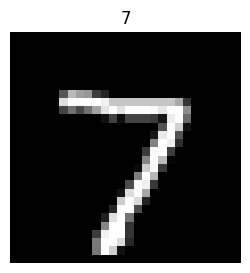

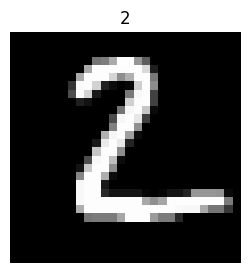

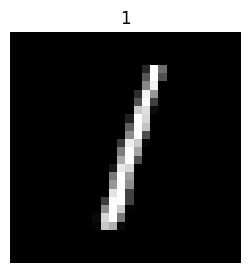

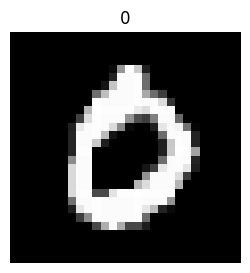

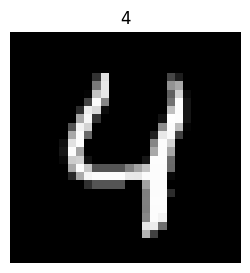

In [9]:
# Visualizing 5 different sample using Matplotlib
import matplotlib.pyplot as plt

num_samples = 5 # Visualize 5 random samples
for image in range(num_samples):
  img = test[image][0] # extrainting 5 random image from test data
  img = img.squeeze()
  label = test[image][1] # the coressponding labels of the images
  plt.figure(figsize=(3, 3))
  plt.imshow(img, cmap="gray")
  plt.title(label)
  plt.axis(False)

7. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [10]:
from torch.utils.data import DataLoader

In [11]:
training = DataLoader(dataset=train,batch_size=32,shuffle=True) # creating dataloader for the train data

In [12]:
testing = DataLoader(dataset=test,batch_size=32,shuffle=True) #creating dataloader for the test data


8. Recreate model_2 used in notebook 03 (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [14]:
from torch import nn
class MNIST_model(torch.nn.Module):
  """Model capable of predicting on MNIST dataset.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7,
                out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv block 1: {x.shape}")
    x = self.conv_block_2(x)
    # print(f"Output shape of conv block 2: {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")
    return x

In [15]:
%%time
from tqdm.auto import tqdm

# Train on CPU
model_cpu = MNIST_model(input_shape=1,
                        hidden_units=10,
                        output_shape=10).to("cpu")

# Create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cpu.parameters(), lr=0.1)

### Training loop
epochs = 5
for epoch in tqdm(range(epochs)):
  train_loss = 0
  for batch, (X, y) in enumerate(training):
    model_cpu.train()

    # Put data on CPU
    X, y = X.to("cpu"), y.to("cpu")

    # Forward pass
    y_pred = model_cpu(X)

    # Loss calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Optimizer zero grad
    optimizer.zero_grad()

    # Loss backward
    loss.backward()

    # Step the optimizer
    optimizer.step()

  # Adjust train loss for number of batches
  train_loss /= len(testing)

  ### Testing loop
  test_loss_total = 0

  # Put model in eval mode
  model_cpu.eval()

  # Turn on inference mode
  with torch.inference_mode():
    for batch, (X_test, y_test) in enumerate(testing):
      # Make sure test data on CPU
      X_test, y_test = X_test.to("cpu"), y_test.to("cpu")
      test_pred = model_cpu(X_test)
      test_loss = loss_fn(test_pred, y_test)

      test_loss_total += test_loss

    test_loss_total /= len(testing)

  # Print out what's happening
  print(f"Epoch: {epoch} | Loss: {train_loss:.3f} | Test loss: {test_loss_total:.3f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Loss: 1.690 | Test loss: 0.061
Epoch: 1 | Loss: 0.398 | Test loss: 0.048
Epoch: 2 | Loss: 0.307 | Test loss: 0.042
Epoch: 3 | Loss: 0.258 | Test loss: 0.041
Epoch: 4 | Loss: 0.224 | Test loss: 0.033
CPU times: user 2min 50s, sys: 1.47 s, total: 2min 52s
Wall time: 2min 54s
